# Poker Hand Data Set 

### Relevant Information:

Each record is an example of a hand consisting of five playing
cards drawn from a standard deck of 52. Each card is described
using two attributes (suit and rank), for a total of 10 predictive
attributes. There is one Class attribute that describes the
�Poker Hand�. The order of cards is important, which is why there
are 480 possible Royal Flush hands as compared to 4 (one for each
suit � explained in more detail below).

### Statistics:

| | | | |
| - | - | - | - |
| Poker Hand       | # of hands	| Probability	| # of combinations
| Royal Flush      | 4		| 0.00000154	| 480
| Straight Flush   | 36		| 0.00001385	| 4320
| Four of a kind   | 624		| 0.0002401	| 74880
| Full house       | 3744		| 0.00144058	| 449280
| Flush            | 5108		| 0.0019654	| 612960
| Straight         | 10200		| 0.00392464	| 1224000
| Three of a kind  | 54912		| 0.02112845	| 6589440
| Two pairs        | 123552		| 0.04753902	| 14826240
| One pair         | 1098240	| 0.42256903	| 31788800
| Nothing          | 1302540	| 0.50117739	| 156304800
| | | | |
| Total            | 2598960	| 1.0		| 311875200

# Preprocessing Data

In [1]:
import numpy as np
import pandas as pd

import keras
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dense, LeakyReLU, Embedding, LSTM
from keras.models import Model
from keras.utils import plot_model
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in [0,9,13]:
    si = plt.style.available[i]
    plt.style.use(si)

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [3]:
path = '../data/Poker/poker-hand-training-true.data'
df = pd.read_csv(path, names=['s1', 'c1', 's2', 'c2', 's3', 'c3', 's4', 'c4', 's5', 'c5', 'label'])

In [4]:
df.head()

,s1,c1,s2,c2,s3,c3,s4,c4,s5,c5,label
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [5]:
def categorazer(df):
    data = to_categorical(df)
    cat = []
    for si in data:
        sj = [list(si[2*j][:4])+list(si[2*j+1])  for j in range(5)]
        cat.append(sj)
    return np.array(cat)

In [6]:
x_train = categorazer(df[df.columns[:-1]])
y_train = to_categorical(df[df.columns[-1]])
x_train[0], y_train[0]

(array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [7]:
# encode test data
df_test = pd.read_csv('../data/Poker/poker-hand-testing.data')
x_test = categorazer(df_test[df_test.columns[:-1]])
y_test = to_categorical(df_test[df_test.columns[-1]])
x_test[0], y_test[0]

(array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0.],
        [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0.]], dtype=float32),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32))

# MLP Model

In [8]:
n_cards, encodding_size = x_train.shape[1:]
n_cards, encodding_size

(5, 18)

In [9]:
tf.reset_default_graph()
inputs = Input(shape=(n_cards, encodding_size, ))
# a layer instance is callable on a tensor, and returns a tensor
x = Flatten()(inputs)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dense(32)(x)
x = LeakyReLU()(x)
x = Dense(16)(x)
x = LeakyReLU()(x)
x = Dense(16)(x)
x = LeakyReLU()(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=predictions)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()
# plot_model(model, to_file='model.png')
# plt.figure(figsize=(10,10))
# img=mpimg.imread('model.png')
# imgplot = plt.imshow(img)
# plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 5, 18)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 90)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2912      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
__________

In [12]:

history = model.fit(x_train, y_train,
                    validation_data=(x_test,y_test),
                    epochs=25, 
                    batch_size=32,)  # starts training

Instructions for updating:
Use tf.cast instead.
Train on 25010 samples, validate on 999999 samples
Epoch 1/25
25010/25010 [==============================] - 16s 637us/step - loss: 1.0525 - acc: 0.4800 - val_loss: 0.9903 - val_acc: 0.4977
Epoch 2/25
25010/25010 [==============================] - 16s 621us/step - loss: 0.9872 - acc: 0.4937 - val_loss: 0.9851 - val_acc: 0.5025
Epoch 3/25
25010/25010 [==============================] - 16s 639us/step - loss: 0.9736 - acc: 0.5215 - val_loss: 0.9726 - val_acc: 0.5205
Epoch 4/25
25010/25010 [==============================] - 16s 620us/step - loss: 0.8994 - acc: 0.5963 - val_loss: 0.8436 - val_acc: 0.6324
Epoch 5/25
25010/25010 [==============================] - 15s 603us/step - loss: 0.7694 - acc: 0.6832 - val_loss: 0.7105 - val_acc: 0.7127
Epoch 6/25
25010/25010 [==============================] - 15s 590us/step - loss: 0.6305 - acc: 0.7557 - val_loss: 0.5791 - val_acc: 0.7778
Epoch 7/25
25010/25010 [==============================] - 15s 590us

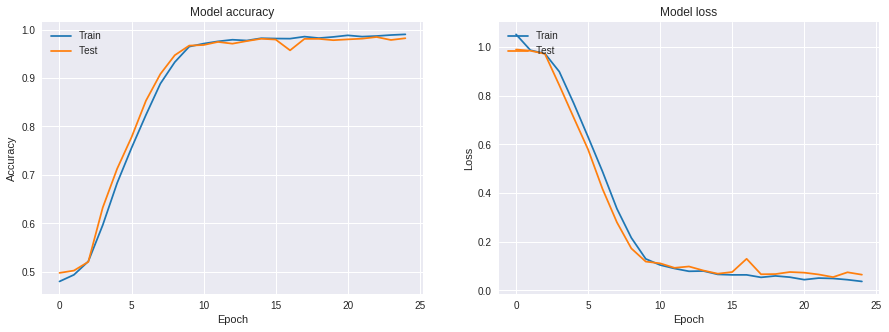

In [18]:
plt.figure(figsize=(15,5))


# Plot training & validation accuracy values
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

## Validation

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
y_pred = model.predict(x_test)
y_pred, y_test

(array([[1.8686013e-07, 9.9999356e-01, 5.3778786e-06, ..., 1.8115231e-28,
         6.0948497e-07, 2.3997730e-09],
        [9.8811608e-07, 9.9999559e-01, 8.4582950e-07, ..., 4.2695599e-30,
         2.2818438e-06, 8.3435573e-08],
        [2.8815844e-08, 9.9999857e-01, 1.0944931e-06, ..., 2.6786883e-30,
         3.8321483e-07, 3.7229051e-09],
        ...,
        [7.7283020e-13, 9.9983466e-01, 1.6535673e-04, ..., 4.2611027e-27,
         2.2503344e-09, 3.8436958e-11],
        [1.8459909e-08, 9.9999845e-01, 1.4773957e-06, ..., 3.7447857e-30,
         6.5634445e-08, 2.7488165e-10],
        [1.6932874e-19, 8.4244031e-03, 9.9137199e-01, ..., 1.0429214e-12,
         9.7350022e-15, 9.1719752e-17]], dtype=float32),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]], dtype=float32))

In [16]:
matrix = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
matrix

,0,1,2,3,4,5,6,7,8,9
0,497326,1768,0,0,2088,0,0,0,0,26
1,258,421144,1081,0,15,0,0,0,0,0
2,0,3868,41296,2458,0,0,0,0,0,0
3,0,0,1019,20027,0,0,75,0,0,0
4,1963,82,0,0,1781,0,0,0,0,59
5,1978,12,0,0,6,0,0,0,0,0
6,0,0,0,1016,0,0,342,66,0,0
7,0,0,0,7,0,0,75,148,0,0
8,6,0,0,0,6,0,0,0,0,0
9,0,0,0,0,2,0,0,0,0,1


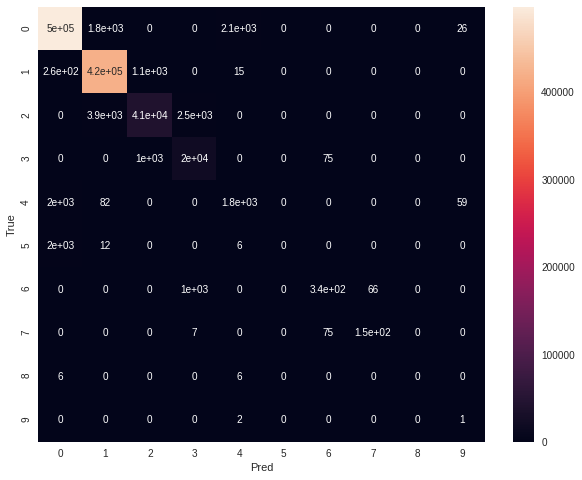

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(matrix,  annot=True)
plt.ylabel('True')
plt.xlabel('Pred');